**Statistical Analysis of E-Commerce Reviews with Sentiment Classification Using a Bidirectional RNN**

**Introduction**

Understanding customer sentiment plays a critical role in shaping effective marketing strategies in today’s highly competitive e-commerce landscape. By analyzing customer feedback, companies can gain valuable insights into how their products and services are perceived, identify areas for improvement, and ultimately enhance customer satisfaction. This research focuses on analyzing customer reviews from a women’s clothing e-commerce platform, aiming to uncover correlations between various variables in the reviews and to classify the sentiments expressed in each review. Specifically, we aim to determine whether a review recommends a product and whether the sentiment conveyed is positive, negative, or neutral.

To achieve these objectives, we conducted statistical analyses, including univariate and multivariate techniques, to explore relationships between different features in the dataset. Additionally, we employed a Bidirectional Recurrent Neural Network (RNN) with a Long Short-Term Memory (LSTM) unit to classify both product recommendations and sentiments in the reviews. Our findings show that customer recommendations are strongly linked to positive sentiment, while review ratings offer less distinct indicators of sentiment. The bidirectional LSTM model demonstrated strong performance, achieving an F1-score of 0.88 for recommendation classification and 0.93 for sentiment classification.

**Dataset Features**

The dataset used in this research contains several important features that contribute to understanding customer reviews and predicting product recommendations and sentiments. Each feature is described below:

1. **Unnamed: 0**: An index column that represents the row number in the dataset. It has no analytical value and is typically ignored in analyses.
   
2. **Clothing ID**: A unique identifier for each product being reviewed. This column helps link reviews to specific items in the e-commerce platform's inventory.
   
3. **Age**: The age of the customer who submitted the review. This demographic variable could provide insights into how customer preferences and sentiments vary across different age groups.

4. **Title**: The title of the customer’s review. Although not used in the sentiment analysis directly in this study, the title offers a brief overview of the customer's feedback.

5. **Review Text**: The main body of the customer’s review, where they describe their experience with the product. This feature plays a central role in sentiment analysis and classification tasks.

6. **Rating**: A numerical rating given by the customer, ranging from 1 (worst) to 5 (best). Ratings provide an initial, albeit sometimes unclear, indication of customer sentiment toward the product.

7. **Recommended IND**: A binary indicator (1 = Yes, 0 = No) that specifies whether the customer recommends the product. This variable is used to analyze the relationship between product recommendation and sentiment.

8. **Positive Feedback Count**: The number of positive feedbacks (e.g., helpful votes) that the review received from other customers. This metric reflects how well-received the review is by the broader community.

9. **Division Name**: The product division to which the item belongs, such as General or Intimates. This categorical feature provides information on product type, which may influence customer preferences and reviews.

10. **Department Name**: A more specific categorical feature that represents the department or category within the division, such as Tops, Dresses, or Bottoms. It helps in segmenting the types of products being reviewed.

11. **Class Name**: The product class, providing further granularity in describing the product. For instance, within the department of Tops, there might be different classes like Blouses or T-Shirts.

Each of these features contributes to our understanding of the reviews, allowing us to better analyze customer behavior and accurately predict sentiment and product recommendations.

In [283]:
import numpy as np
import pandas as pd

In [284]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                      Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...   
3                                                                                                                                                                                                                                                                                                                                                                                         I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                     This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops    Bl

In [285]:
df.shape

(23486, 11)

In [286]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [287]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

DROP NULL ROWS IN REVIEW TEXT COLUMN AND IMPUTE OTHER COLUMNS WITH NULL VALUES

In [289]:
#drop rows with null values
df = df.dropna(subset= 'Review Text')

In [290]:
from sklearn.impute import SimpleImputer
#impute null values with the most frequent entries
imputer = SimpleImputer(strategy = 'most_frequent')

df[['Title', 'Division Name', 'Department Name', 'Class Name']] = imputer.fit_transform (df[['Title', 'Division Name', 'Department Name', 'Class Name']])

In [291]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [292]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                 Love it!   
1           1         1080   34                 Love it!   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                      Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...   
3                                                                                                                                                                                                                                                                                                                                                                                         I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                     This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops    Bl

In [293]:
df.describe()

Unnamed: 0   Clothing ID           Age        Rating  \
count  22641.000000  22641.000000  22641.000000  22641.000000   
mean   11740.849035    919.332362     43.280376      4.183561   
std     6781.957509    202.266874     12.326980      1.115762   
min        0.000000      1.000000     18.000000      1.000000   
25%     5872.000000    861.000000     34.000000      4.000000   
50%    11733.000000    936.000000     41.000000      5.000000   
75%    17621.000000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     22641.000000             22641.000000  
mean          0.818868                 2.630582  
std           0.385136                 5.786164  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           1.000000               122.000000

In [294]:
df[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis =1)


unique       top   freq
Title            13992  Love it!   3102
Division Name        3   General  13378
Department Name      6      Tops  10061
Class Name          20   Dresses   6158

UNIVARIATE DISTRIBUTIONS

Age and Positive Feedback Frequency Distributions


C:\Users\muran\AppData\Local\Temp\ipykernel_2544\1433997515.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, ax=ax[0])
C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\muran\AppData\Local\Temp\ipykernel_2544\1433997515.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibili

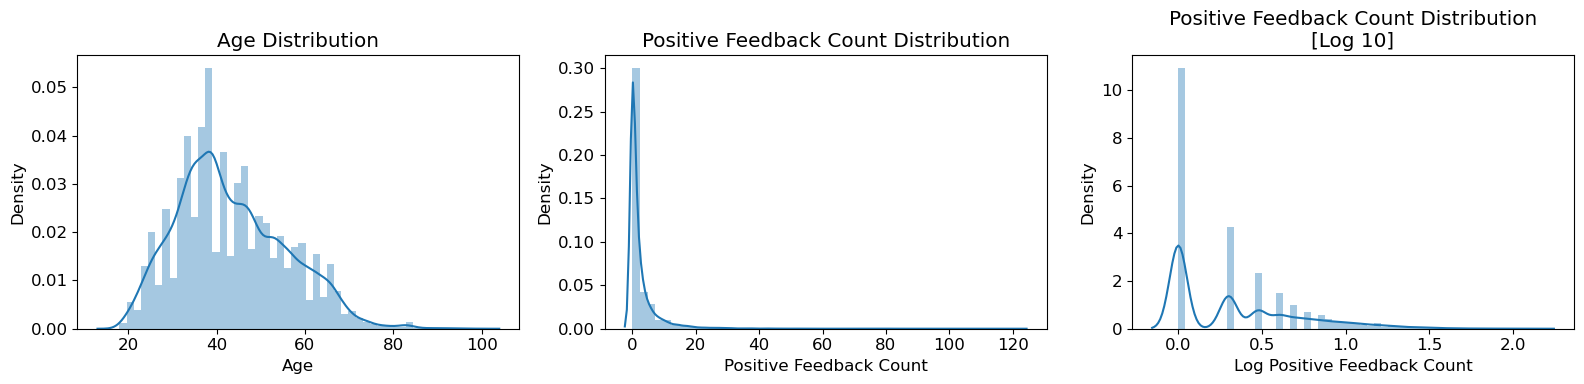

In [297]:

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(df['Positive Feedback Count'], ax=ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.distplot(np.log10((df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plt.show()

DIVISION AND DEPARTMENT NAME

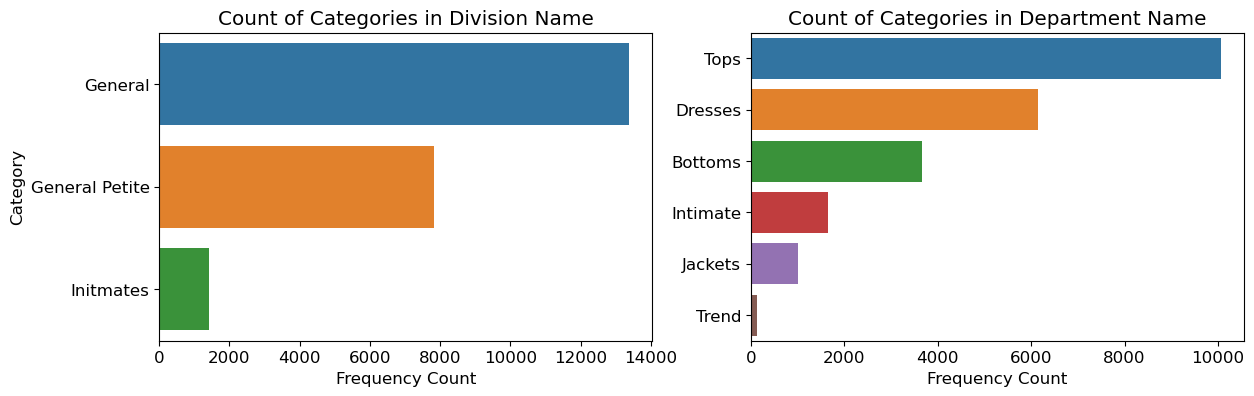

In [299]:
row_plots = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

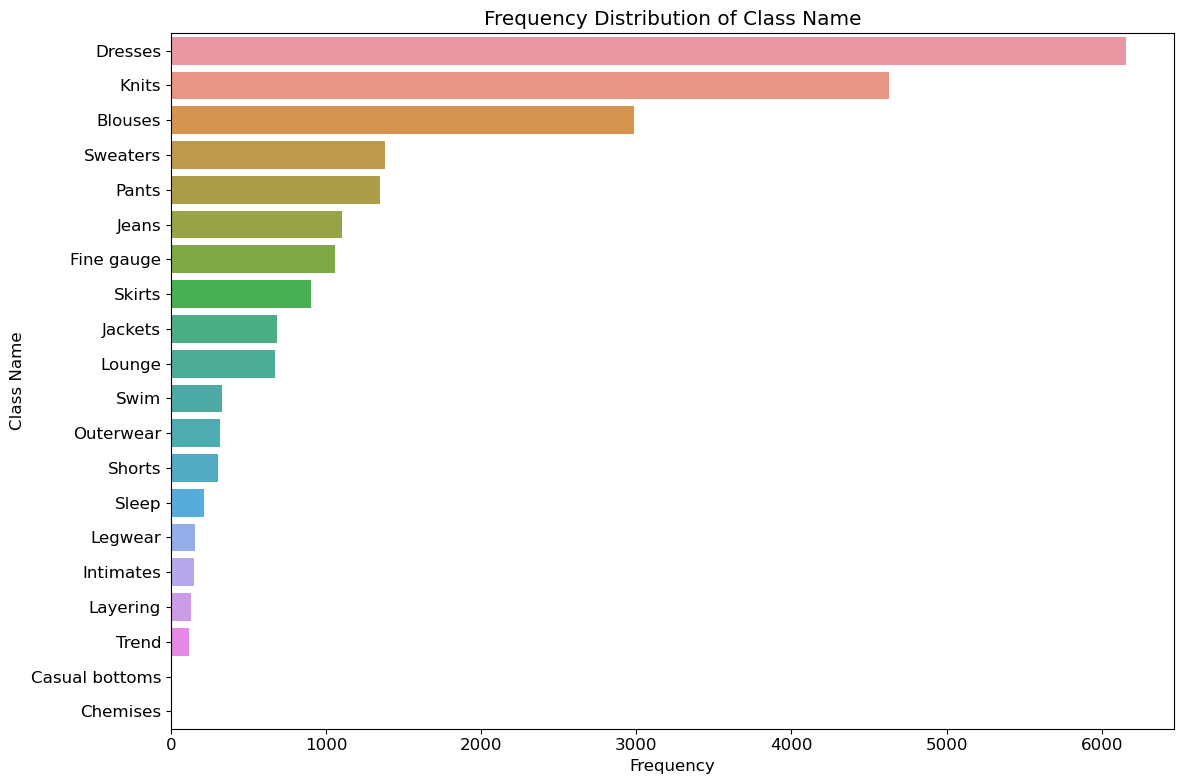

In [300]:
# Class Name
plt.subplots(figsize=(12, 8))
sns.countplot(y='Class Name', data=df,order=df['Class Name'].value_counts().index)
plt.title('Frequency Distribution of Class Name')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('freqdist-classname.png', format='png', dpi=300)
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

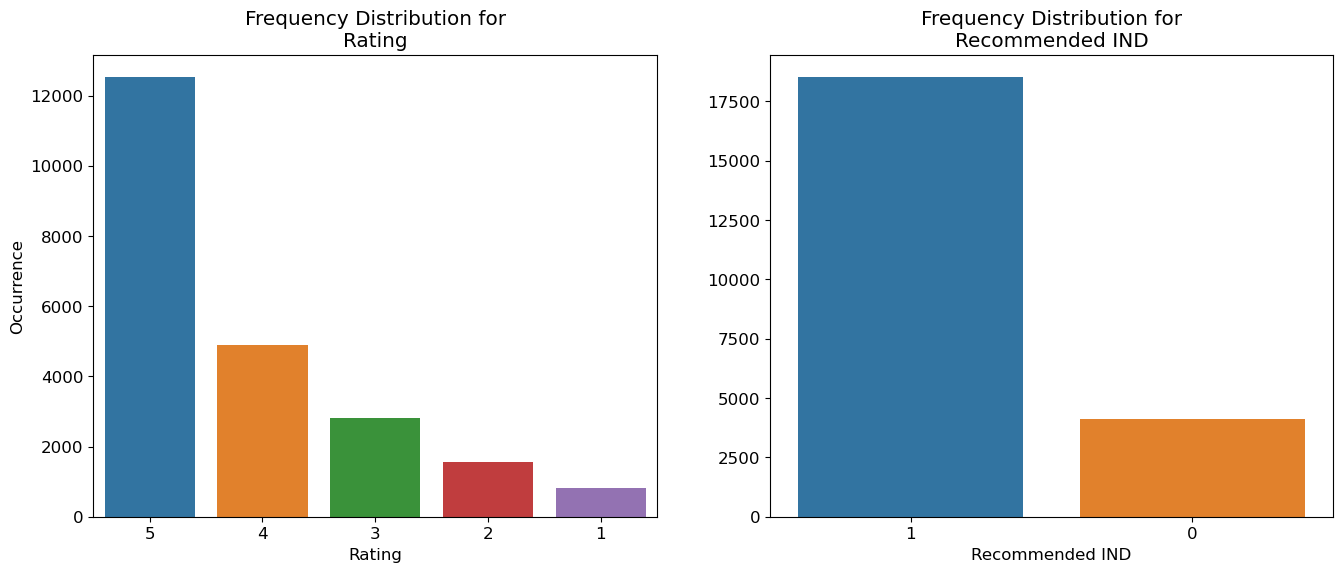

In [301]:
cat_dtypes = ['Rating', 'Recommended IND']
increment = 0
f, axes = plt.subplots(1, len(cat_dtypes), figsize=(16, 6), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df, order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title('Frequency Distribution for\n{}'.format(cat_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.savefig('freqdist-rating-recommended-label.png', format='png', dpi=300)
plt.show()

Word Count by Rating, Department Name, and Recommended IND

C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

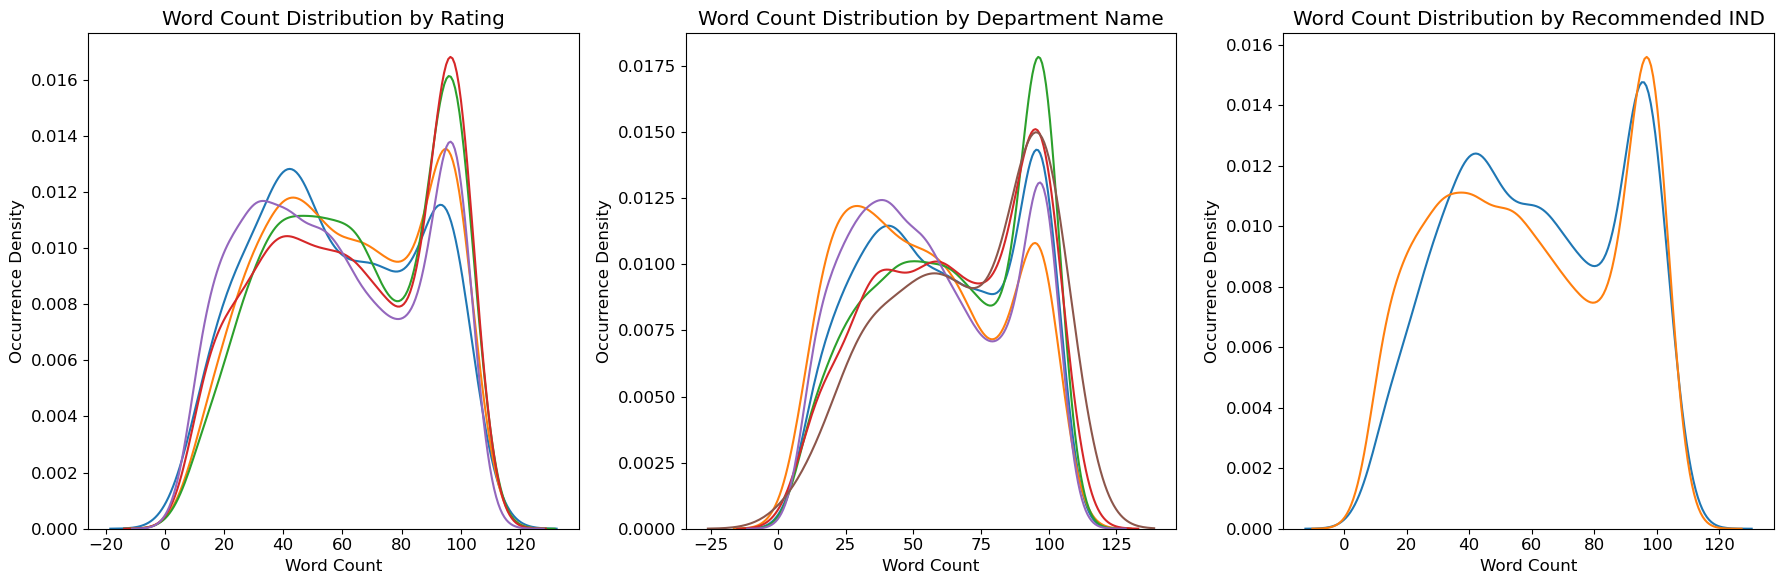

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is already loaded and contains 'Review Text', 'Rating', 'Department Name', and 'Recommended IND'

# Create 'Word Count' column based on the number of words in 'Review Text'
df['Word Count'] = df['Review Text'].apply(lambda x: len(str(x).split()))

# Now the plot should work
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for index, y in enumerate(['Rating', 'Department Name', 'Recommended IND']):
    for x in set(df[y].dropna()):  # Handle missing values properly
        sns.kdeplot(df['Word Count'][df[y] == x], label=x, fill=False, ax=axes[index])
        axes[index].set_title('{} Distribution by {}'.format('Word Count', y))
    axes[index].set_ylabel('Occurrence Density')

plt.tight_layout()
plt.show()


**MULTIVRIATE ANALYSIS**

Categorical Variable by Categorical Variable

Division Name by Department Name

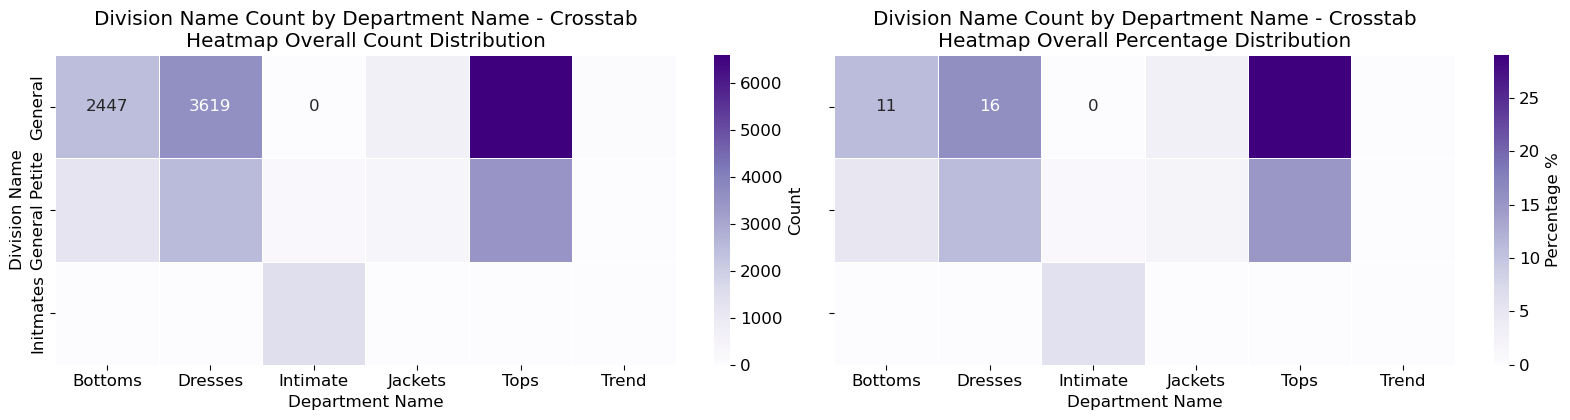

In [315]:
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Purples',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Purples',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname.png', format='png', dpi=300)
plt.show()

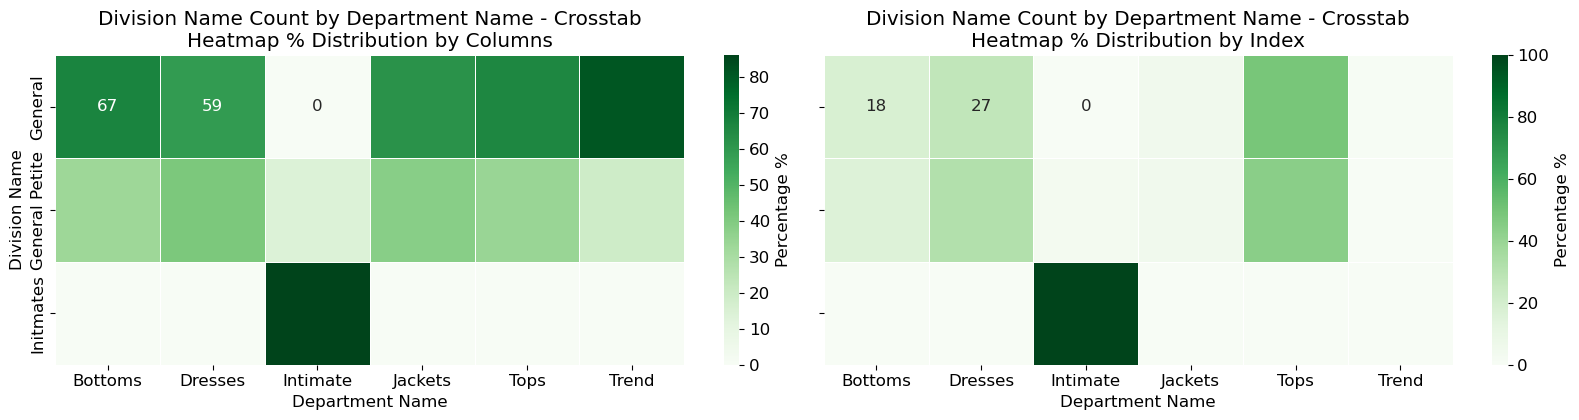

In [316]:
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname-pivot.png', format='png', dpi=300)
plt.show()

Class Name by Department Name

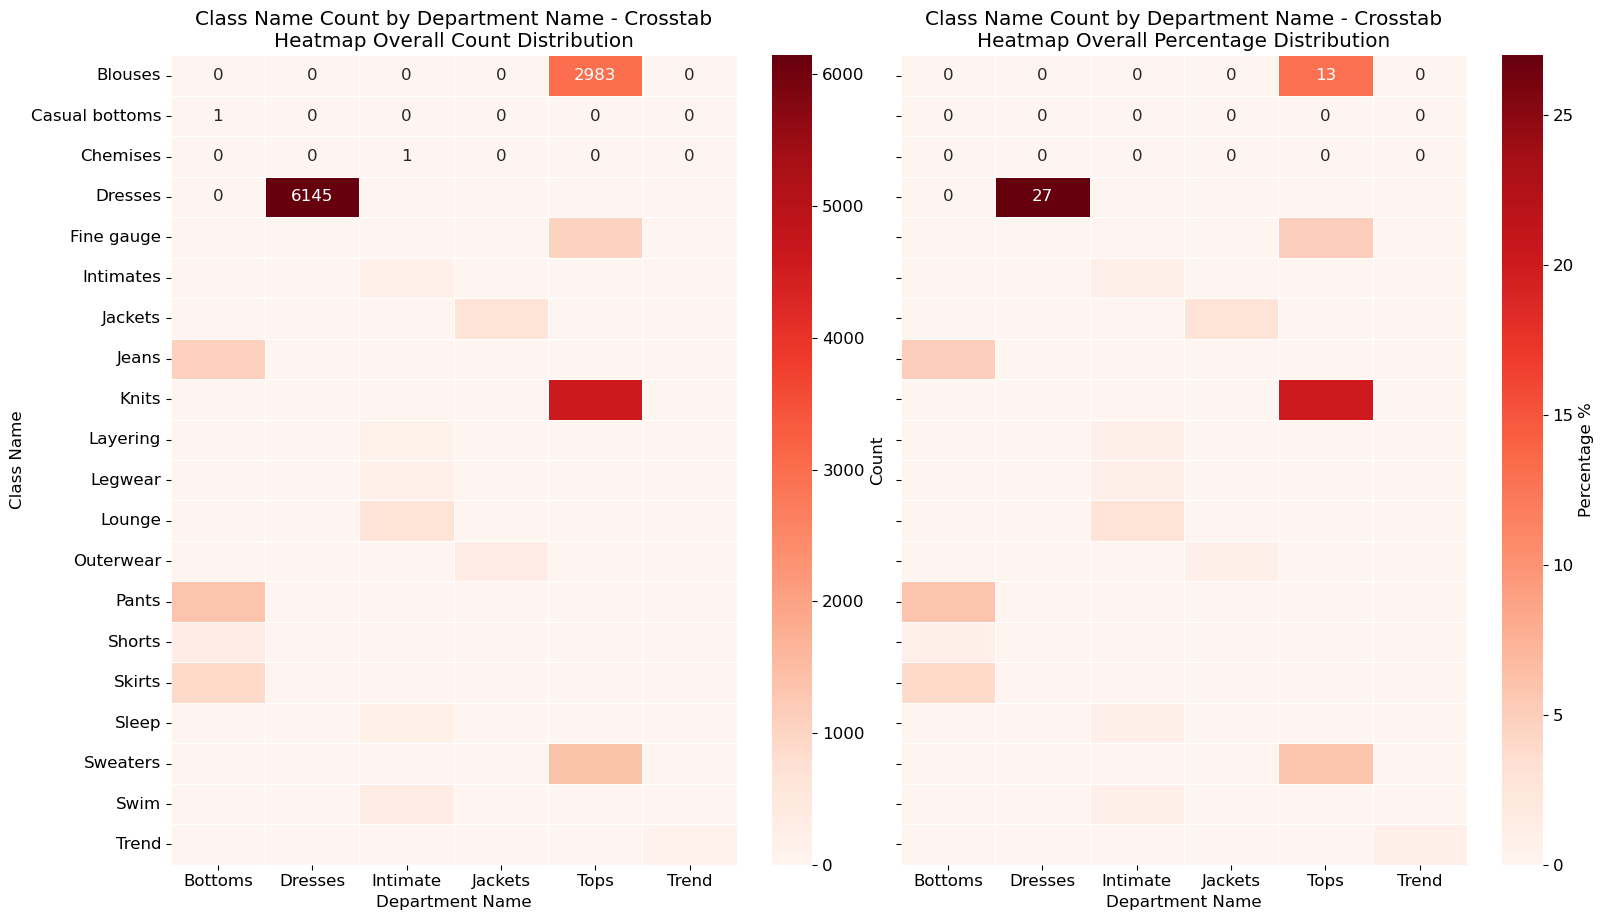

In [317]:
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Reds',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Reds',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-deptname.png', format='png', dpi=300)
plt.show()

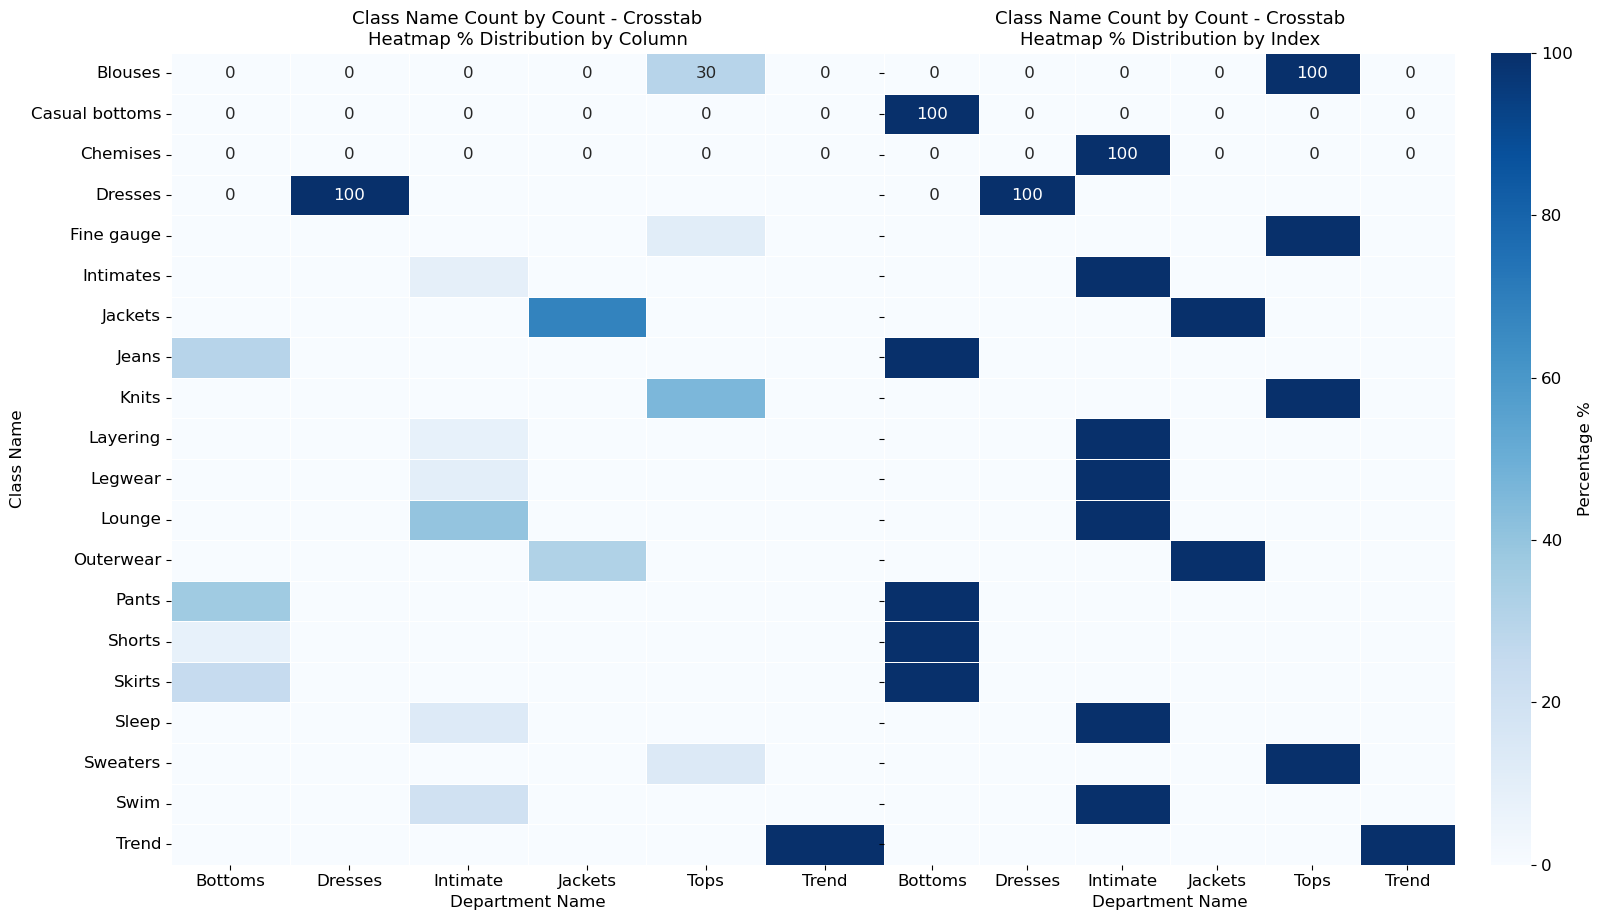

In [318]:
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize = 'columns').mul(100).round(0),
            annot=True, fmt='g', linewidths=.5, ax=ax[0],cbar=False, cmap='Blues')
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize=fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize = 'index').mul(100).round(0),
                    annot=True, fmt='2g', linewidths=.5, ax=ax[1],cmap='Blues',
                    cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize=fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-deptname-pivot.png', format='png', dpi=300)
plt.show()

Division Name by Department Name

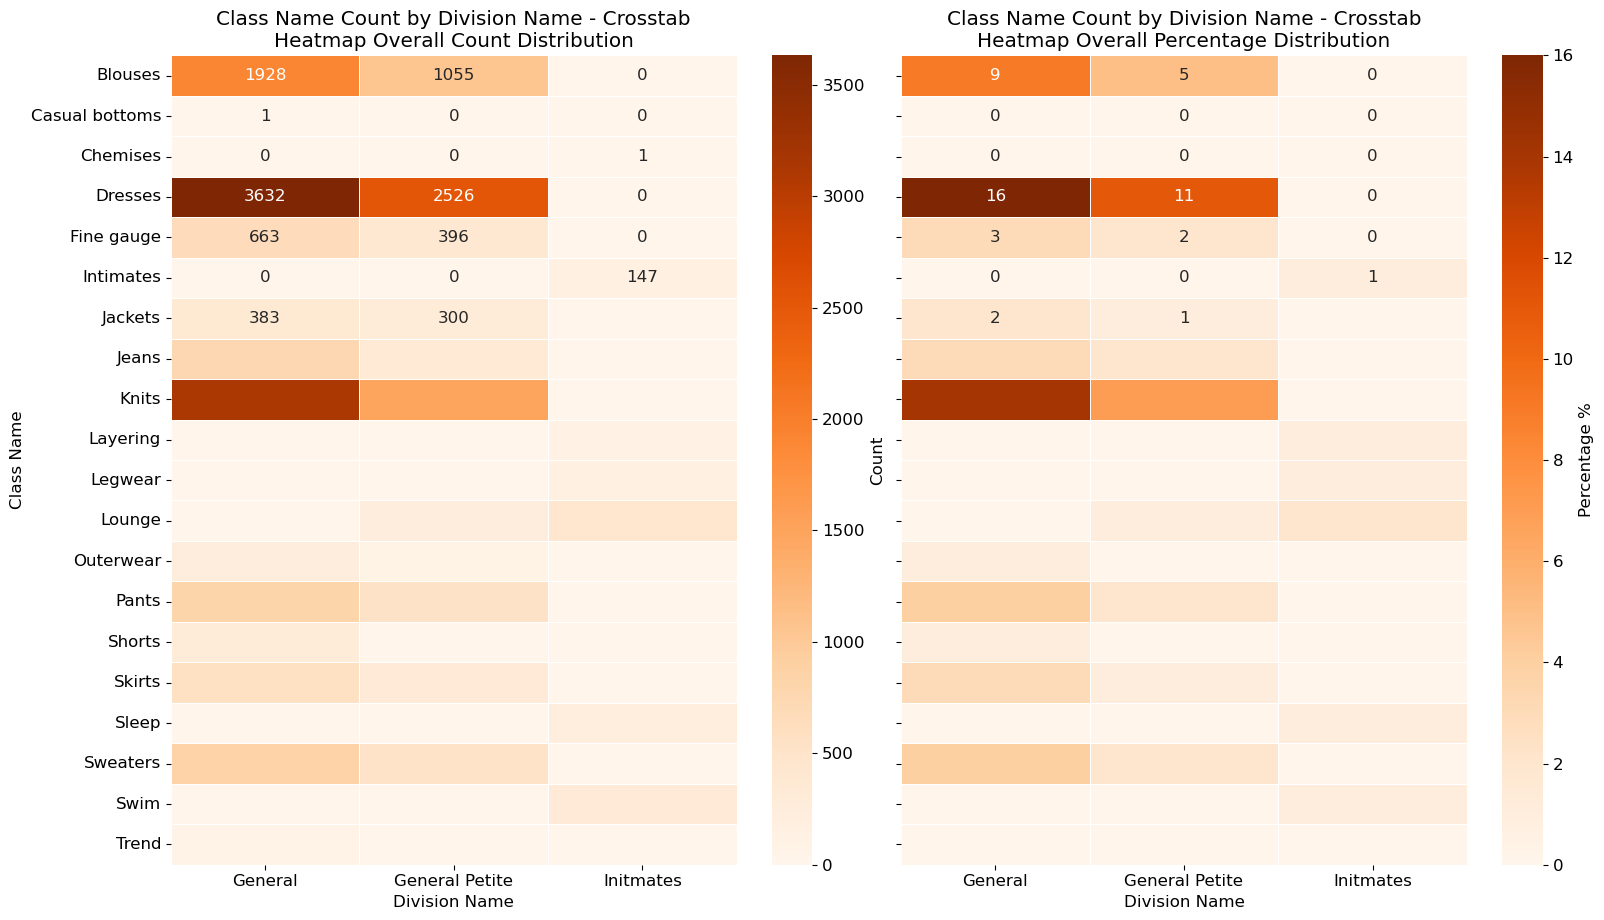

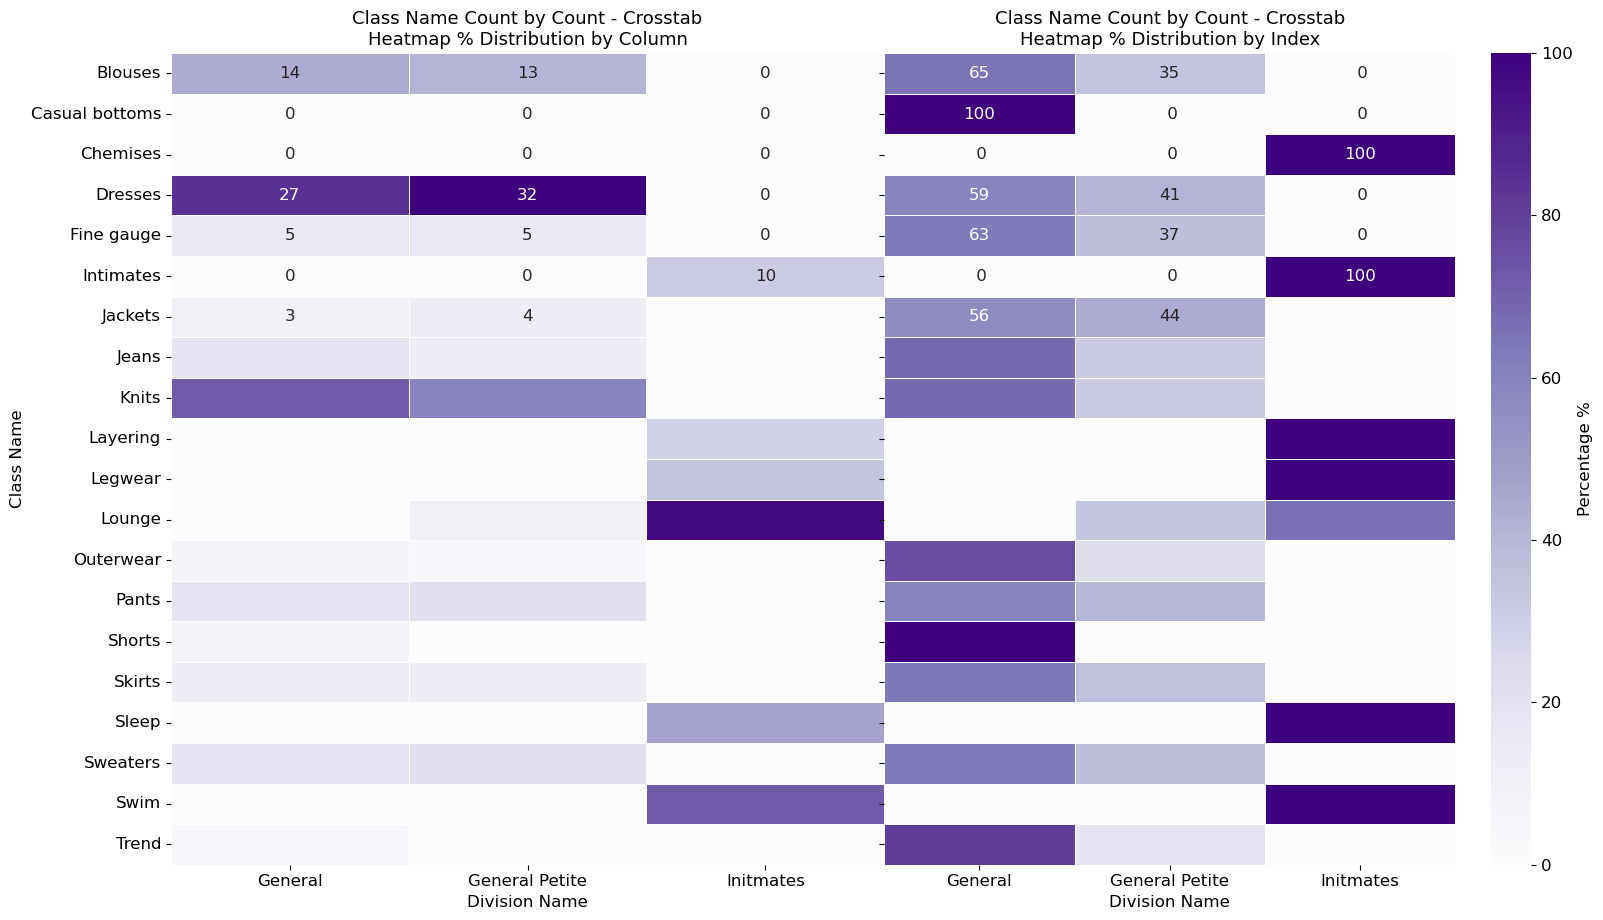

In [319]:
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Oranges',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1], fmt='g', cmap='Oranges',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-divname.png', format='png', dpi=300)
plt.show()

# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize = 'columns').mul(100).round(0),
            annot=True, fmt='g', linewidths=.5, ax=ax[0],cbar=False,cmap='Purples')
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize = 'index').mul(100).round(0),
                    annot=True, fmt='2g', linewidths=.5, ax=ax[1], cmap='Purples',
                    cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize=fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-divname-pivot.png', format='png', dpi=300)

CONTINIOUS VARIABLES BY CONTINIOUS VARIABLES

Average Rating and Recommended IND by Clothing ID Correlation

C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


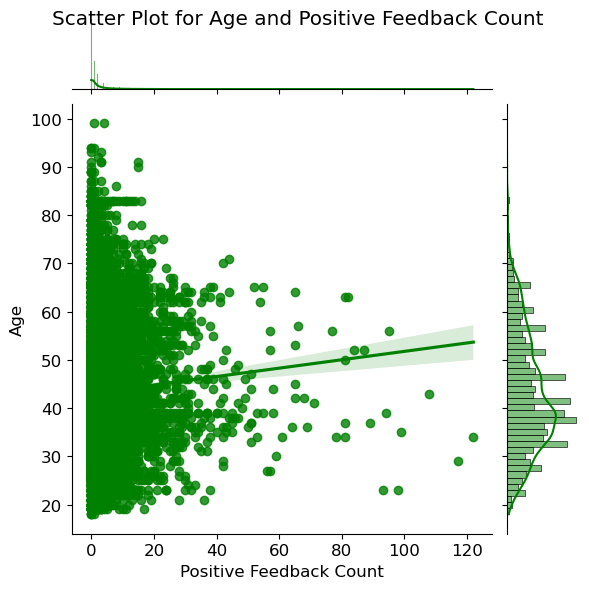

In [321]:
def minmaxscaler(df):
    return (df - df.min()) / (df.max() - df.min())

def zscorenomalize(df):
    return (df - df.mean()) / df.std()

g = sns.jointplot(x=df['Positive Feedback Count'], y=df['Age'], kind='reg', color='g')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.savefig('positivefeedback-age.png', format='png', dpi=300)
plt.show()

<Axes: >

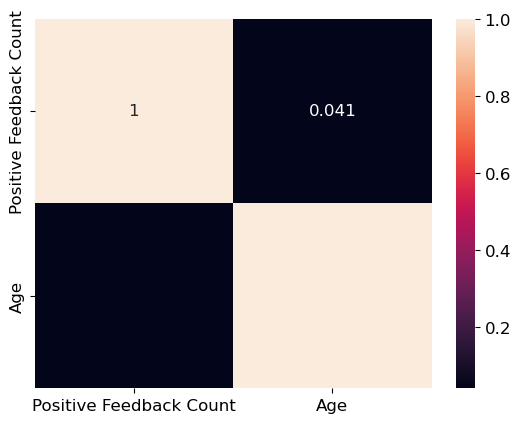

In [322]:
sns.heatmap(df[['Positive Feedback Count', 'Age']].corr(), annot=True)


Percentage Standardize Distribution Plots

In [323]:
def percentstandardize_barplot(x, y, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x=x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
          .reset_index(drop=True)
          .groupby([x])[hue]
          .value_counts(normalize=True)
          .rename('Percentage').mul(100)
          .reset_index()
          .sort_values(hue)))
    plt.title('Percentage Frequency of {} by {}'.format(hue, x))
    plt.ylabel('Percentage %')

Recommended IND by Department and Division

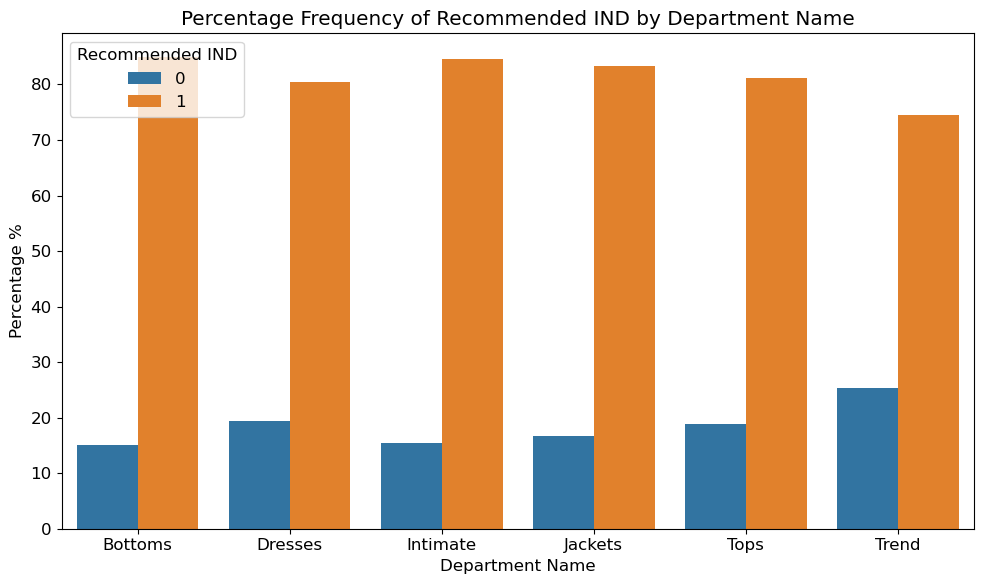

In [324]:
def percentstandardize_barplot(x, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are an extension of Seaborn's.
    """
    # Convert hue column to string to avoid numpy.int64 issues
    data[hue] = data[hue].astype(str)
    
    # Create ax if it's not provided
    if ax is None:
        ax = plt.gca()

    sns.barplot(
        x=x, 
        y='Percentage', 
        hue=hue, 
        ax=ax, 
        order=order,
        data=(data[[x, hue]]
              .reset_index(drop=True)
              .groupby([x])[hue]
              .value_counts(normalize=True)
              .rename('Percentage')
              .mul(100)
              .reset_index()
              .sort_values(hue))
    )
    
    ax.set_title(f'Percentage Frequency of {hue} by {x}')
    ax.set_ylabel('Percentage %')

# Example of calling the function
plt.figure(figsize=(10, 6))
percentstandardize_barplot(x='Department Name', hue='Recommended IND', data=df)
plt.tight_layout()
plt.show()


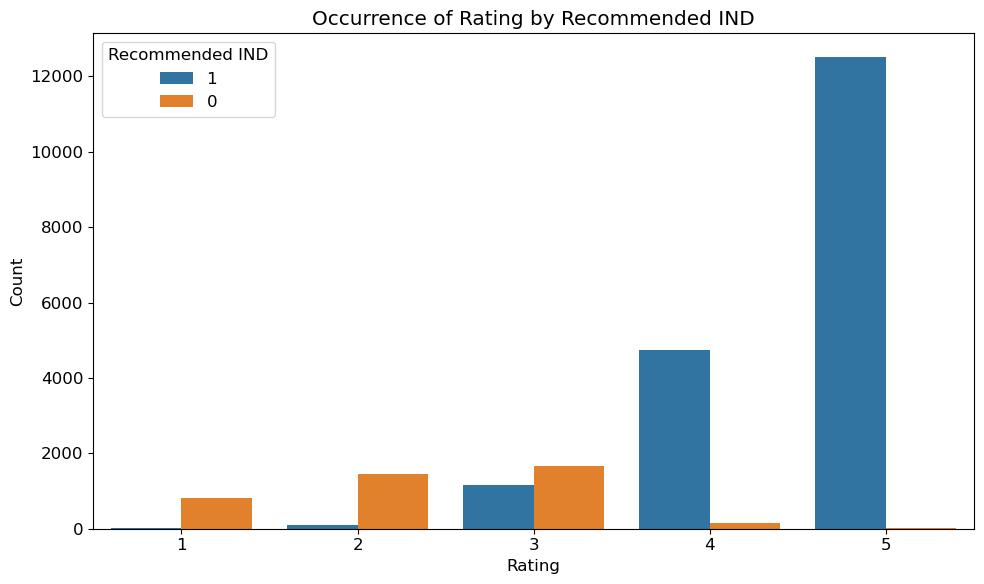

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Recommended IND' is treated as a string for hue handling
df['Recommended IND'] = df['Recommended IND'].astype(str)

# Create subplots
fig = plt.figure(figsize=(10, 6))

# Plot countplot
sns.countplot(x='Rating', hue='Recommended IND', data=df)
plt.title('Occurrence of Rating by Recommended IND')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


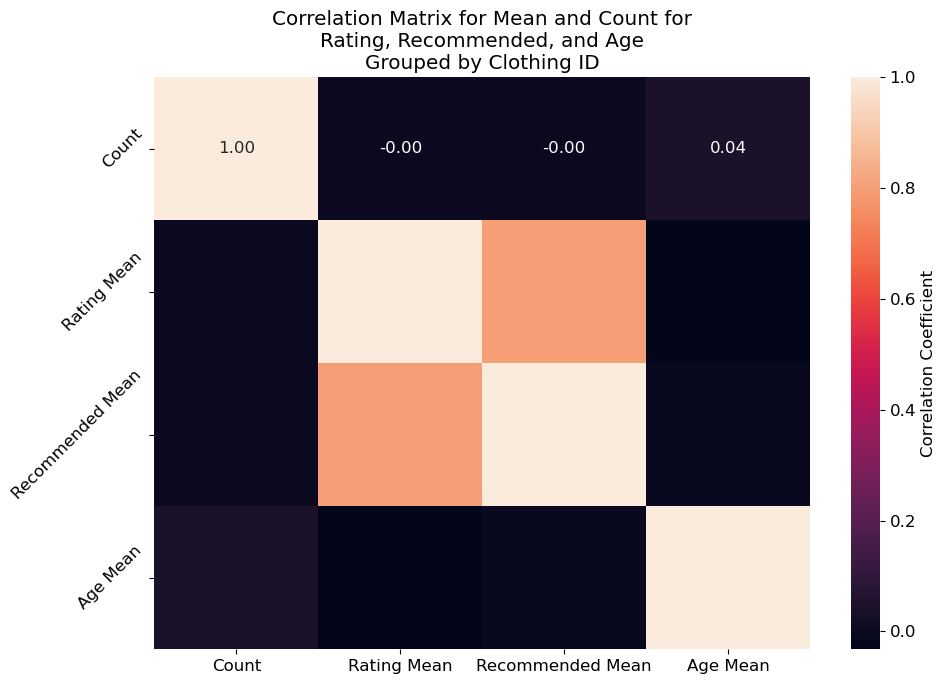

In [326]:
df['Recommended IND'] = pd.to_numeric(df['Recommended IND'], errors='coerce')


temp = (df.groupby('Clothing ID')[['Rating', 'Recommended IND', 'Age']]
        .aggregate(['count', 'mean']))
temp.columns = ['Count', 'Rating Mean', 'Recommended IND Count',
                'Recommended Mean', 'Age Count', 'Age Mean']
temp.drop(['Recommended IND Count', 'Age Count'], axis=1, inplace=True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[10, 7])
ax = sns.heatmap(temp.corr(),
                 annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix for Mean and Count for\nRating, Recommended, and Age\nGrouped by Clothing ID')
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('meanrating-recommended-clothing-corr.png', format='png', dpi=300)
plt.show()

C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


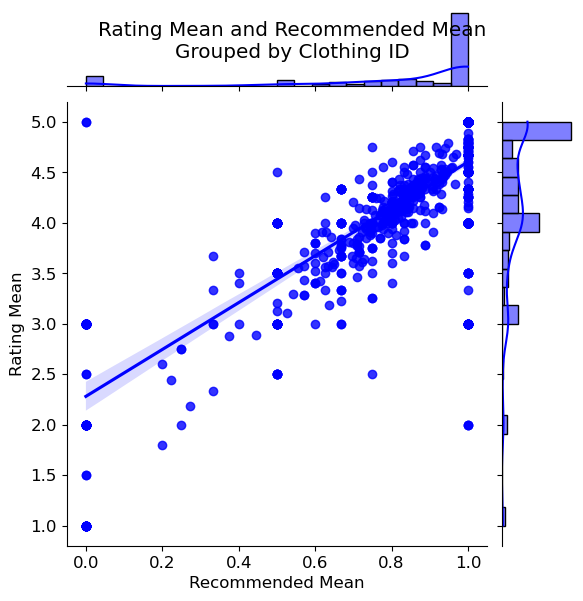

In [327]:
g = sns.jointplot(x='Recommended Mean', y='Rating Mean', data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle('Rating Mean and Recommended Mean\nGrouped by Clothing ID')
plt.savefig('meanrating-recommended-clothing.png', format='png', dpi=300)
plt.show()


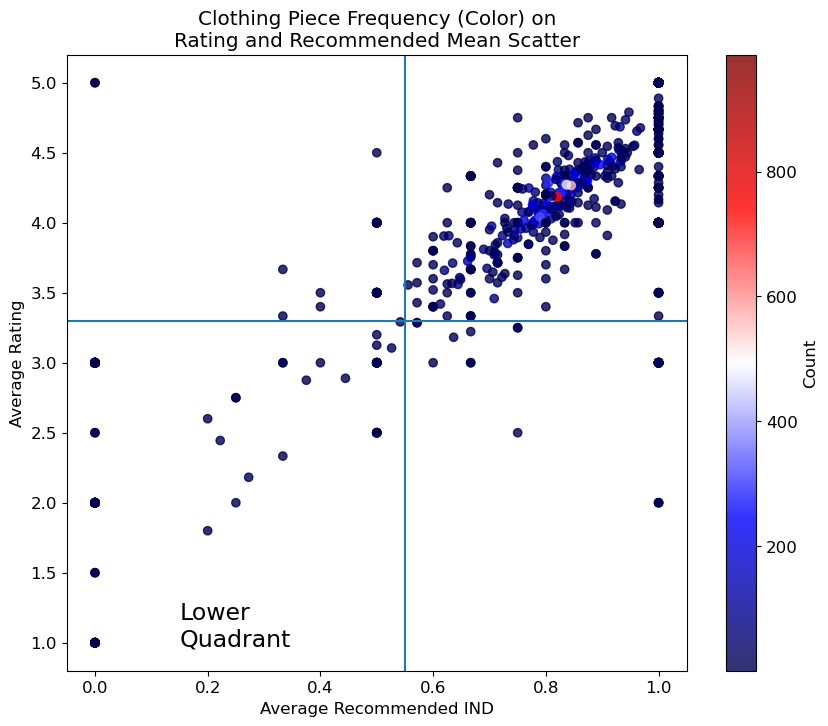

Count  Rating Mean  Recommended Mean    Age Mean
count  204.000000   204.000000        204.000000  204.000000
mean     2.308824     2.763338          0.316315   41.883954
std      2.798261     0.819220          0.351723   10.858979
min      1.000000     1.000000          0.000000   20.000000
25%      1.000000     2.136364          0.000000   34.687500
50%      1.000000     3.000000          0.250000   41.142857
75%      2.000000     3.000000          0.500000   47.000000
max     24.000000     5.000000          1.000000   74.000000

In [329]:
plt.figure(figsize=(10, 8))
plt.scatter(temp['Recommended Mean'], temp['Rating Mean'],
            alpha=.8, c=temp["Count"], cmap='seismic')
cbar = plt.colorbar()
cbar.set_label('Count', rotation=90)
plt.xlabel('Average Recommended IND')
plt.ylabel('Average Rating')
plt.title('Clothing Piece Frequency (Color) on\nRating and Recommended Mean Scatter')

# Vertical and Horizontal Lines
l = plt.axhline(y=3.3)
l = plt.axvline(x=.55)

# Text
plt.text(.15, 1, 'Lower\nQuadrant', ha='left', wrap=True, fontsize=17)
plt.savefig('low-quadrant.png', format='png', dpi=300)
plt.show()

# Descriptives for LOW QUADRANT
temp[(temp['Rating Mean'] < 3.3) | (temp['Recommended Mean'] <= .55)].describe()

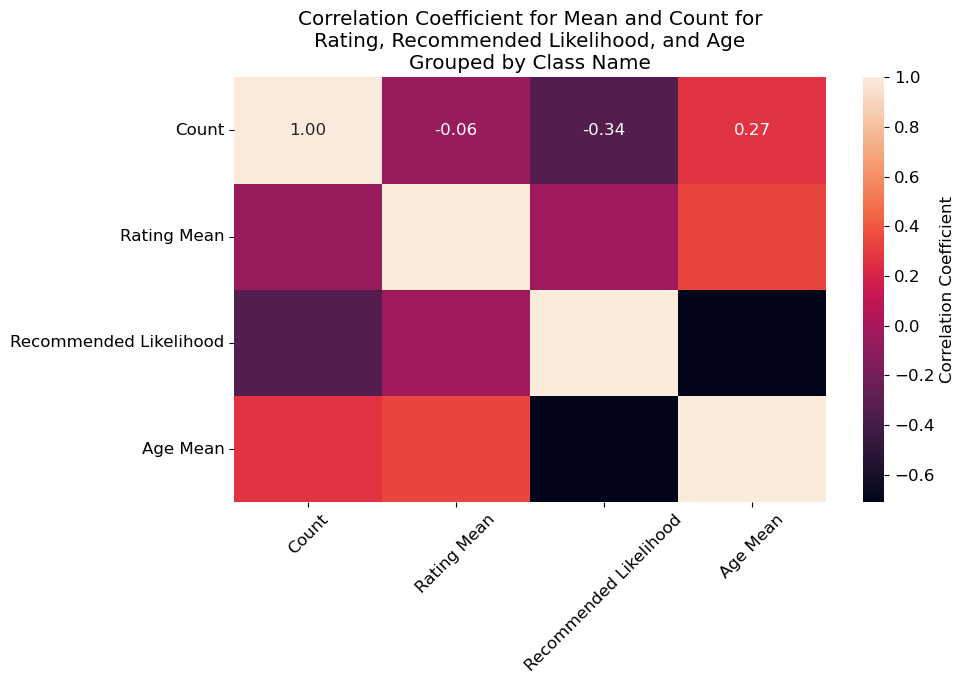

Class Categories:
 ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [330]:
key = 'Class Name'
temp = (df.groupby(key)[['Rating', 'Recommended IND', 'Age']]
        .aggregate(['count', 'mean']))
temp.columns = ['Count', 'Rating Mean', 'Recommended Likelihood Count',
                'Recommended Likelihood', 'Age Count', 'Age Mean']
temp.drop(['Recommended Likelihood Count', 'Age Count'], axis=1, inplace=True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[10, 7])
ax = sns.heatmap(temp.corr(),
                 annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Coefficient for Mean and Count for\nRating, Recommended Likelihood, and Age\nGrouped by {}'.format(key))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('meanrating-recommended-classname-corr.png', format='png', dpi=300)
plt.show()
print('Class Categories:\n',df['Class Name'].unique())

WORKING WITH TEXT

In [332]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].head(4)

Title  \
0                 Love it!   
1                 Love it!   
2  Some major design flaws   
3         My favorite buy!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                      Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...   
3                                                                                                                                                                                                                                                                                                                                                                                         I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   

   Rating  
0       4  
1       5  
2       3  
3       5

In [333]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [334]:
stemmer  = PorterStemmer()
tokenizer  = RegexpTokenizer(r'\w+')
stopwords = set(stopwords.words('english'))

def preprocessing(data):
    text = data.str.lower().str.cat(sep=' ')
    words = tokenizer.tokenize(txt)
    words = [w for w in words if not w in stop_words]
    words = [ps.stem(w) for w in words]
    return words 


In [357]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['Review Text'] = df['Review Text'].astype(str)
# Function to calculate sentiment based on polarity score


# Applying the sentiment intensity analyzer to calculate the scores
df['Polarity Score'] = df['Review Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Neutral Score'] = df['Review Text'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
df['Negative Score'] = df['Review Text'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['Positive Score'] = df['Review Text'].apply(lambda x: analyzer.polarity_scores(x)['pos'])

# Applying the custom function to assign sentiment labels
df['Sentiment'] = df['Polarity Score'].apply(get_sentiment)

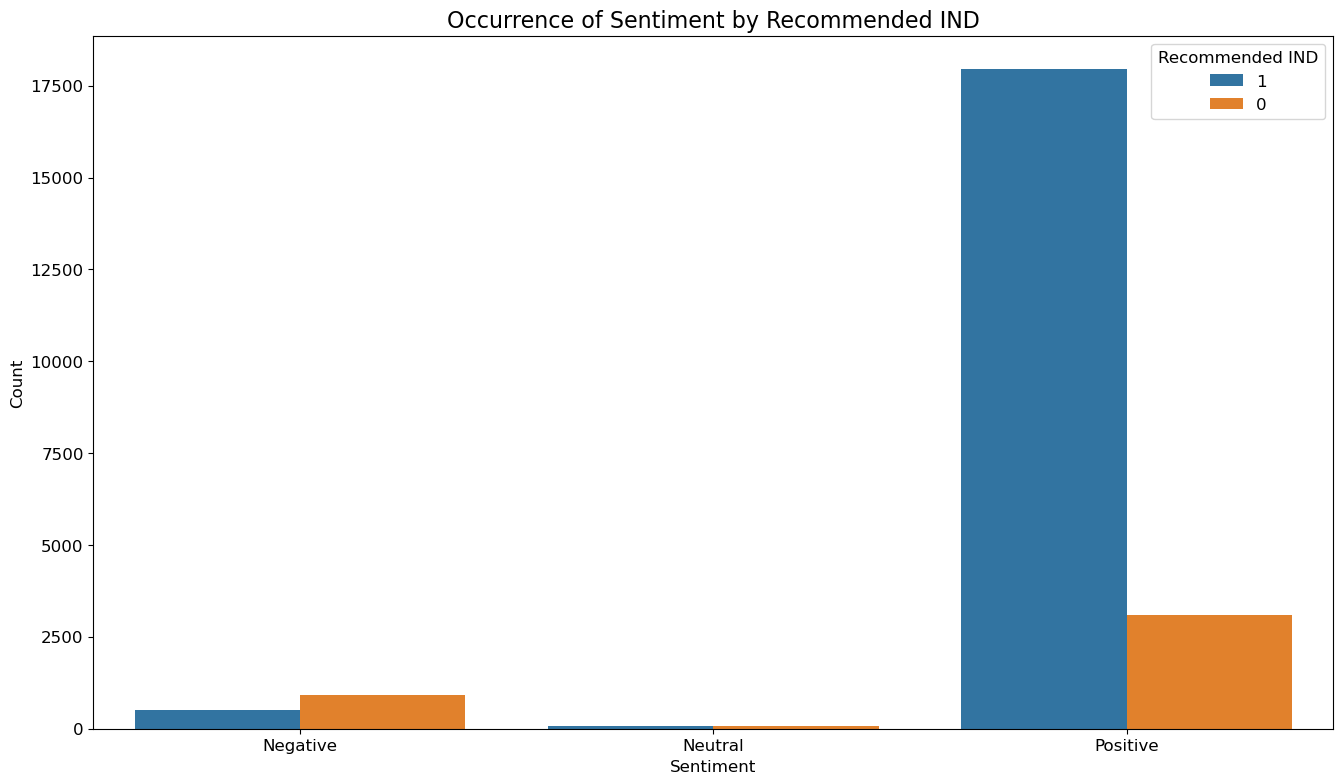

In [385]:
# Convert 'Recommended IND' to a categorical variable with string representation
df['Recommended IND'] = df['Recommended IND'].astype(str)

huevar = 'Recommended IND'
xvar = 'Sentiment'

# Create the figure
fig = plt.figure(figsize=(16, 9))

# Plot with the countplot function and ensure the order is correctly specified
sns.countplot(x=xvar, hue=huevar, data=df, order=['Negative', 'Neutral', 'Positive'])

# Add title and labels
plt.title(f'Occurrence of {xvar} by {huevar}', fontsize=16)
plt.ylabel('Count')
plt.xlabel(xvar)

# Show the plot
plt.show()


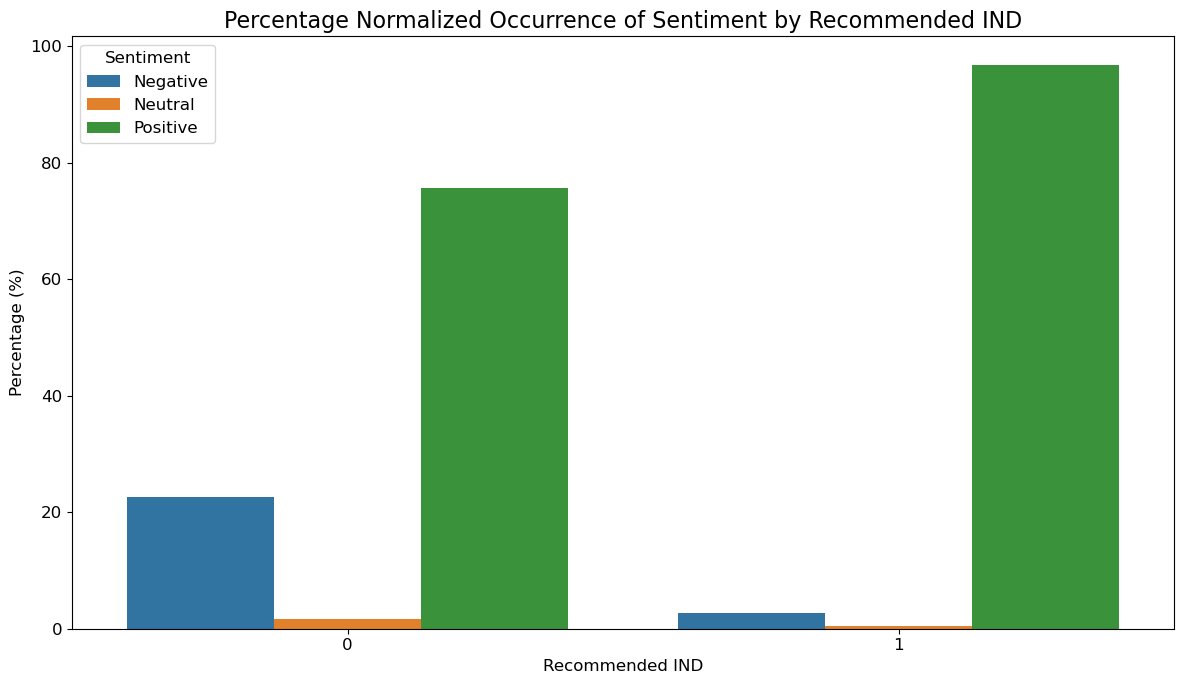

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Recommended IND' to a string if necessary
df['Recommended IND'] = df['Recommended IND'].astype(str)

# Calculate the percentage of Sentiment within each Recommended IND group
percentage_df = df.groupby(['Recommended IND', 'Sentiment']).size().reset_index(name='Count')
percentage_df['Percentage'] = percentage_df.groupby('Recommended IND')['Count'].transform(lambda x: x / x.sum() * 100)

# Plot using Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='Recommended IND', y='Percentage', hue='Sentiment', data=percentage_df)

# Add titles and labels
plt.title('Percentage Normalized Occurrence of Sentiment by Recommended IND', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Recommended IND', fontsize=12)

# Display the legend
plt.legend(title='Sentiment', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


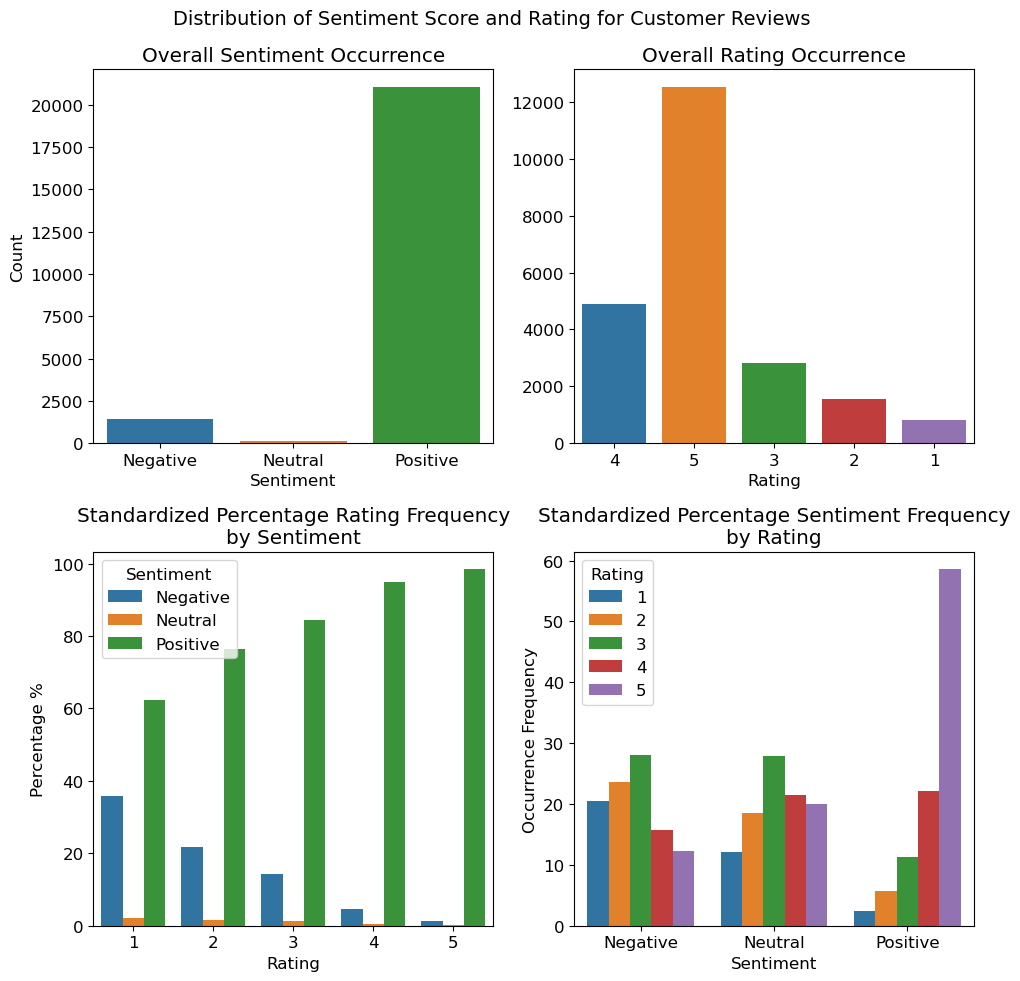

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Rating' column to string for categorical representation
df['Rating'] = df['Rating'].astype(str)

# Calculate percentages for Rating by Sentiment
percentage_rating = df.groupby(['Rating', 'Sentiment']).size().reset_index(name='Count')
percentage_rating['Percentage'] = percentage_rating.groupby('Rating')['Count'].transform(lambda x: x / x.sum() * 100)

# Calculate percentages for Sentiment by Rating
percentage_sentiment = df.groupby(['Sentiment', 'Rating']).size().reset_index(name='Count')
percentage_sentiment['Percentage'] = percentage_sentiment.groupby('Sentiment')['Count'].transform(lambda x: x / x.sum() * 100)

# Create subplots
f, axes = plt.subplots(2, 2, figsize=[10, 10])

# Overall Sentiment Occurrence
sns.countplot(x='Sentiment', data=df, ax=axes[0, 0], order=['Negative', 'Neutral', 'Positive'])
axes[0,0].set_xlabel('Sentiment')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Overall Sentiment Occurrence')

# Overall Rating Occurrence
sns.countplot(x='Rating', data=df, ax=axes[0, 1])
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('')
axes[0,1].set_title('Overall Rating Occurrence')

# Standardized Percentage Rating Frequency by Sentiment
sns.barplot(x='Rating', y='Percentage', hue='Sentiment', data=percentage_rating, ax=axes[1, 0])
axes[1,0].set_xlabel('Rating')
axes[1,0].set_ylabel('Percentage %')
axes[1,0].set_title('Standardized Percentage Rating Frequency\nby Sentiment')

# Standardized Percentage Sentiment Frequency by Rating
sns.barplot(x='Sentiment', y='Percentage', hue='Rating', data=percentage_sentiment, ax=axes[1, 1])
axes[1,1].set_xlabel('Sentiment')
axes[1,1].set_ylabel('Occurrence Frequency')
axes[1,1].set_title('Standardized Percentage Sentiment Frequency\nby Rating')

# Main title and layout adjustments
f.suptitle('Distribution of Sentiment Score and Rating for Customer Reviews', fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)

# Save figure and show plot
plt.savefig('sentimentscoredist-rating.png', format='png', dpi=300)
plt.show()


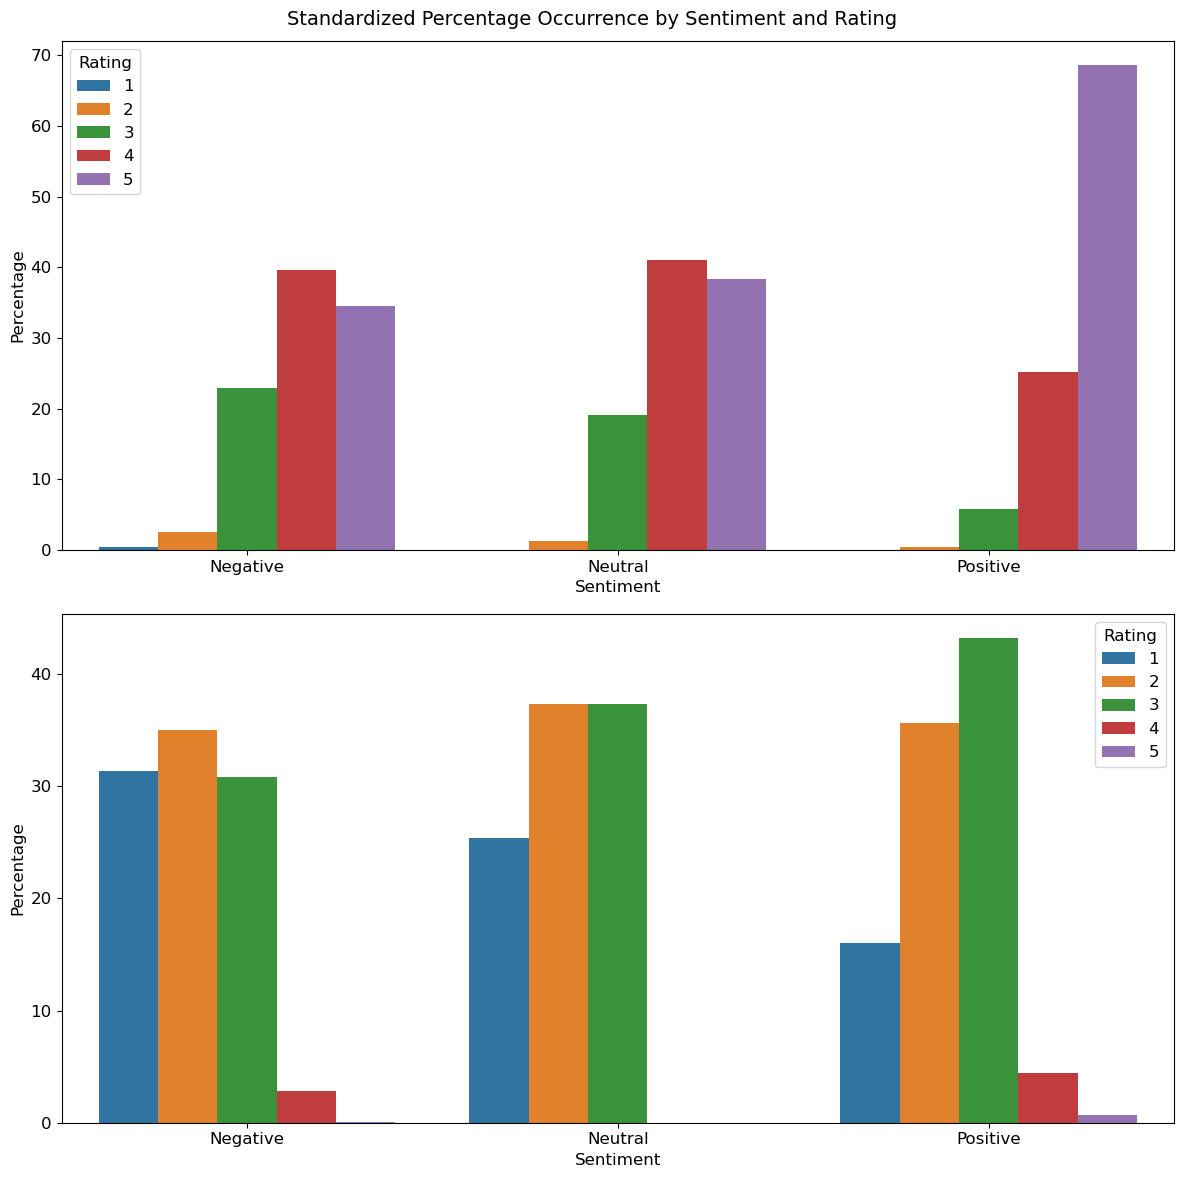

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the data contains columns like 'Sentiment', 'Rating', etc.

# Convert 'Rating' to string for categorical plotting
df['Rating'] = df['Rating'].astype(str)

# Function to calculate percentage and create a bar plot
def percentage_barplot(xvar, huevar, data, ax, order=None):
    # Calculate percentages
    counts = data.groupby([xvar, huevar]).size().reset_index(name='Count')
    counts['Percentage'] = counts.groupby(xvar)['Count'].transform(lambda x: (x / x.sum()) * 100)
    
    # Plot bar chart
    sns.barplot(x=xvar, y='Percentage', hue=huevar, data=counts, ax=ax, order=order)

# Variables for columns to plot
xvar = 'Sentiment'  # Can also be 'Rating'
huevar = 'Rating'  # Can also be 'Sentiment'
rowvar = 'Recommended IND'

# Create subplots (2 rows, 1 column)
f, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=False, sharey=False)

# Plot each subset of data by 'Recommended IND'
for i, x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    if i >= 2:  # Only plot for the first 2 unique values of 'Recommended IND' to fit the subplots
        break
    subset_data = df[df[rowvar] == x]  # Filter the data for each 'Recommended IND' value
    percentage_barplot(xvar='Sentiment', huevar='Rating', data=subset_data, ax=axes[i], order=['Negative', 'Neutral', 'Positive'])

# Plot Aesthetics
f.suptitle('Standardized Percentage Occurrence by Sentiment and Rating', fontsize=14)
plt.tight_layout()
plt.show()


In [417]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Word Count', 'Polarity Score',
       'Neutral Score', 'Negative Score', 'Positive Score', 'Sentiment'],
      dtype='object')

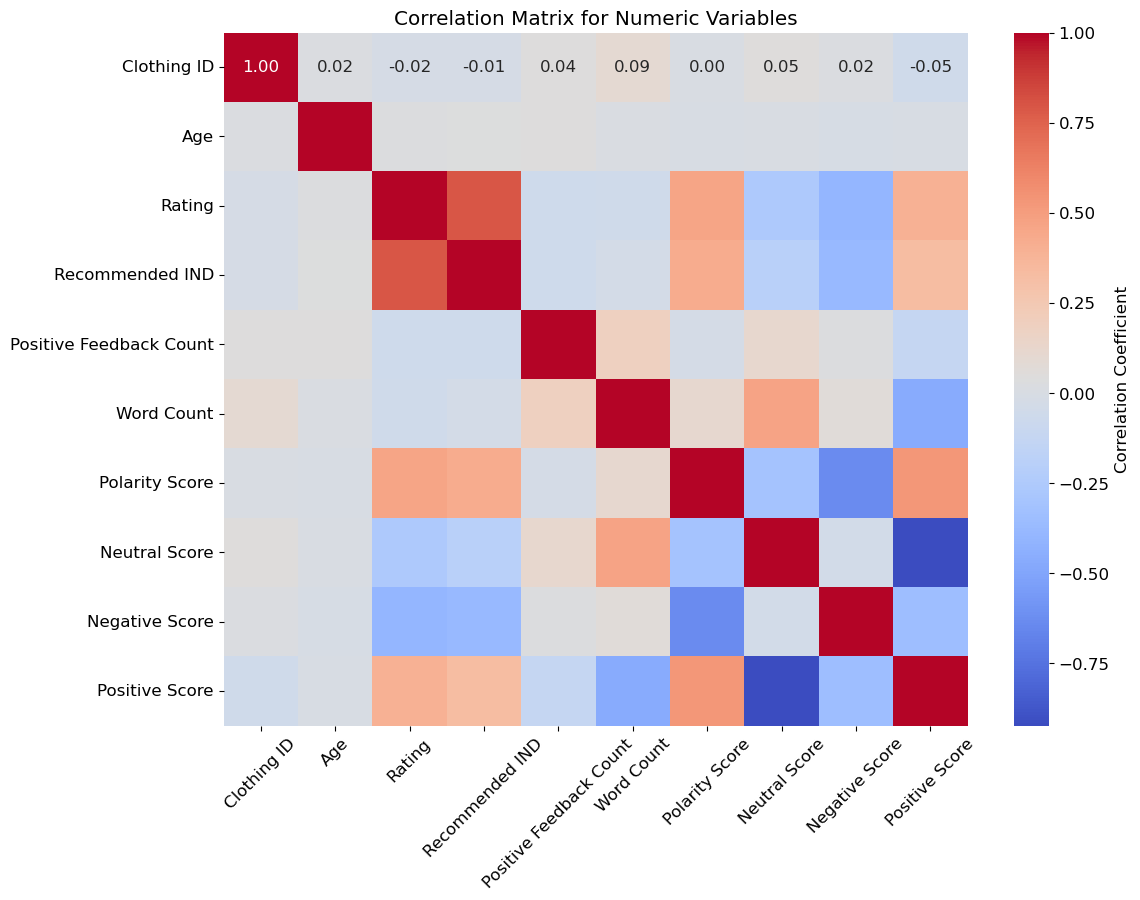

In [423]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the DataFrame
numeric_columns = ['Clothing ID', 'Age', 'Rating', 'Recommended IND', 
                   'Positive Feedback Count', 'Word Count', 'Polarity Score', 
                   'Neutral Score', 'Negative Score', 'Positive Score']

# Create a DataFrame with only the numeric columns
numeric_df = df[numeric_columns]

# Create the heatmap
f, ax = plt.subplots(figsize=[12, 9])
ax = sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', 
                 cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix for Numeric Variables')
plt.xticks(rotation=45)
plt.show()


C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\muran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


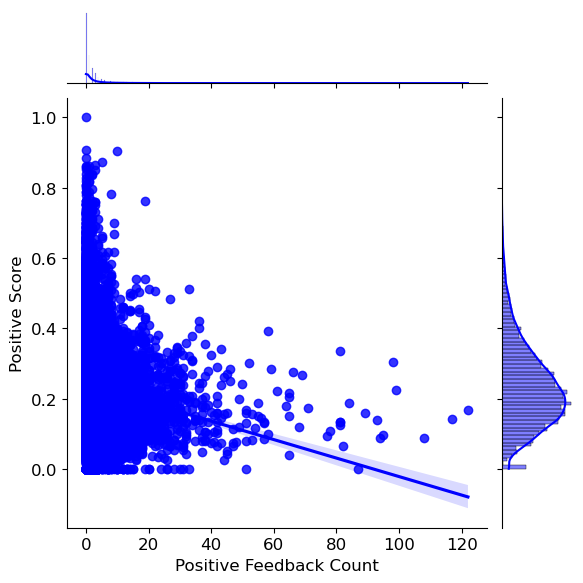

In [427]:
sns.jointplot(x= df['Positive Feedback Count'], y=df['Positive Score'], kind='reg', color='b')
plt.show()

In [431]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS

# Function to generate a word cloud
def cloud(text, title, stopwords=STOPWORDS, size=(20, 10)):
    # Set Matplotlib parameters for display
    mpl.rcParams['figure.figsize'] = (10.0, 10.0)
    mpl.rcParams['font.size'] = 12
    mpl.rcParams['savefig.dpi'] = 300
    mpl.rcParams['figure.subplot.bottom'] = .1
    
    # Generate the word cloud
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords).generate(str(text))
    
    # Create the figure
    fig = plt.figure(figsize=size, facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50, color='y')
    plt.tight_layout(pad=0)
    
    # Save the word cloud image
    plt.savefig(f'{title}.png', format='png', dpi=300)
    plt.show()

# Function to visualize word frequency using a bar chart
def wordfreqviz(text, top_N=20):
    # Calculate word frequency distribution
    word_dist = nltk.FreqDist(text)
    
    # Create a DataFrame for the top N words
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    
    # Plot the word frequency
    mpl.style.use('ggplot')
    rslt.plot.bar(rot=0, figsize=(12, 6), legend=False)
    plt.title(f'Top {top_N} Word Frequencies')
    plt.ylabel('Frequency')
    plt.xlabel('Word')
    plt.show()

# Function to return the word frequency as a DataFrame
def wordfreq(text, top_N=20):
    # Calculate word frequency distribution
    word_dist = nltk.FreqDist(text)
    
    # Return the top N words as a DataFrame
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst


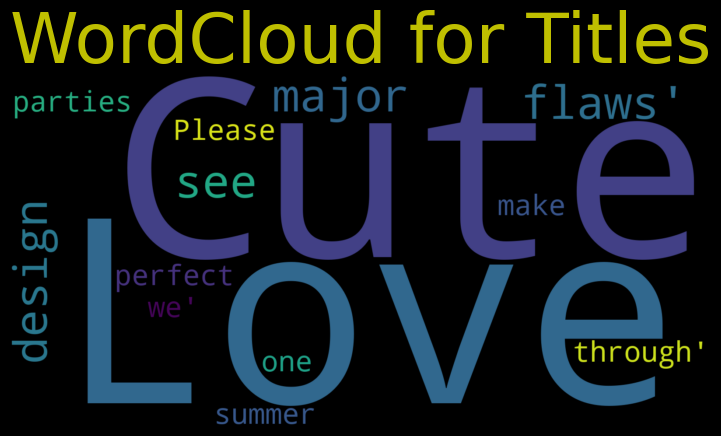

In [433]:
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df['Class Name'][df['Class Name'].notnull()].unique())]
                + ['dress', 'petite'])

# Cloud
cloud(text=df.Title[df.Title.notnull()].astype(str).values,
      title='WordCloud for Titles',
      stopwords=new_stop,
      size = (7,4))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


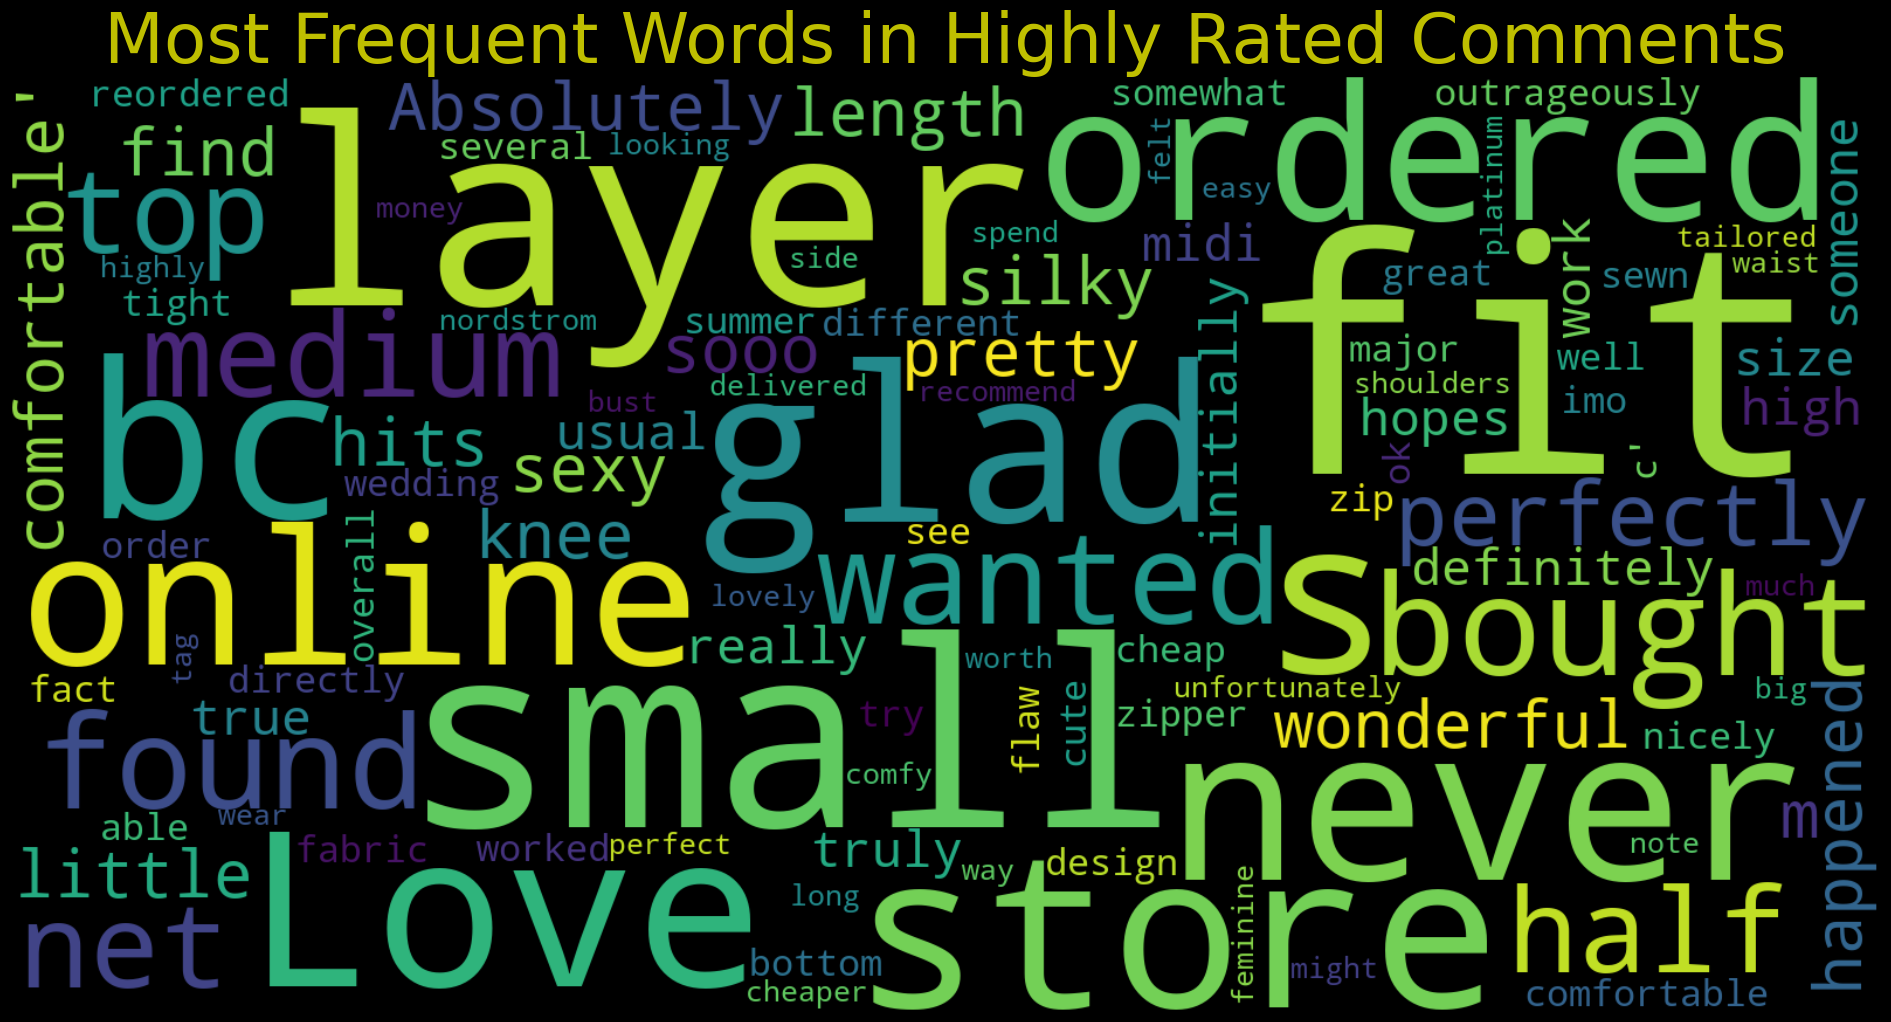

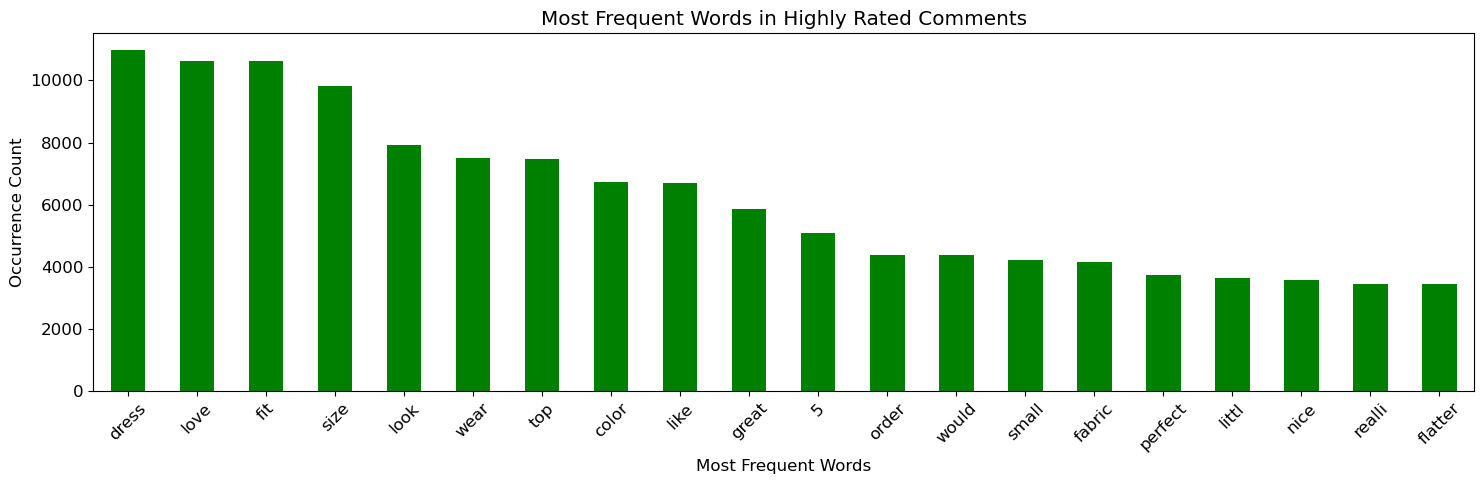

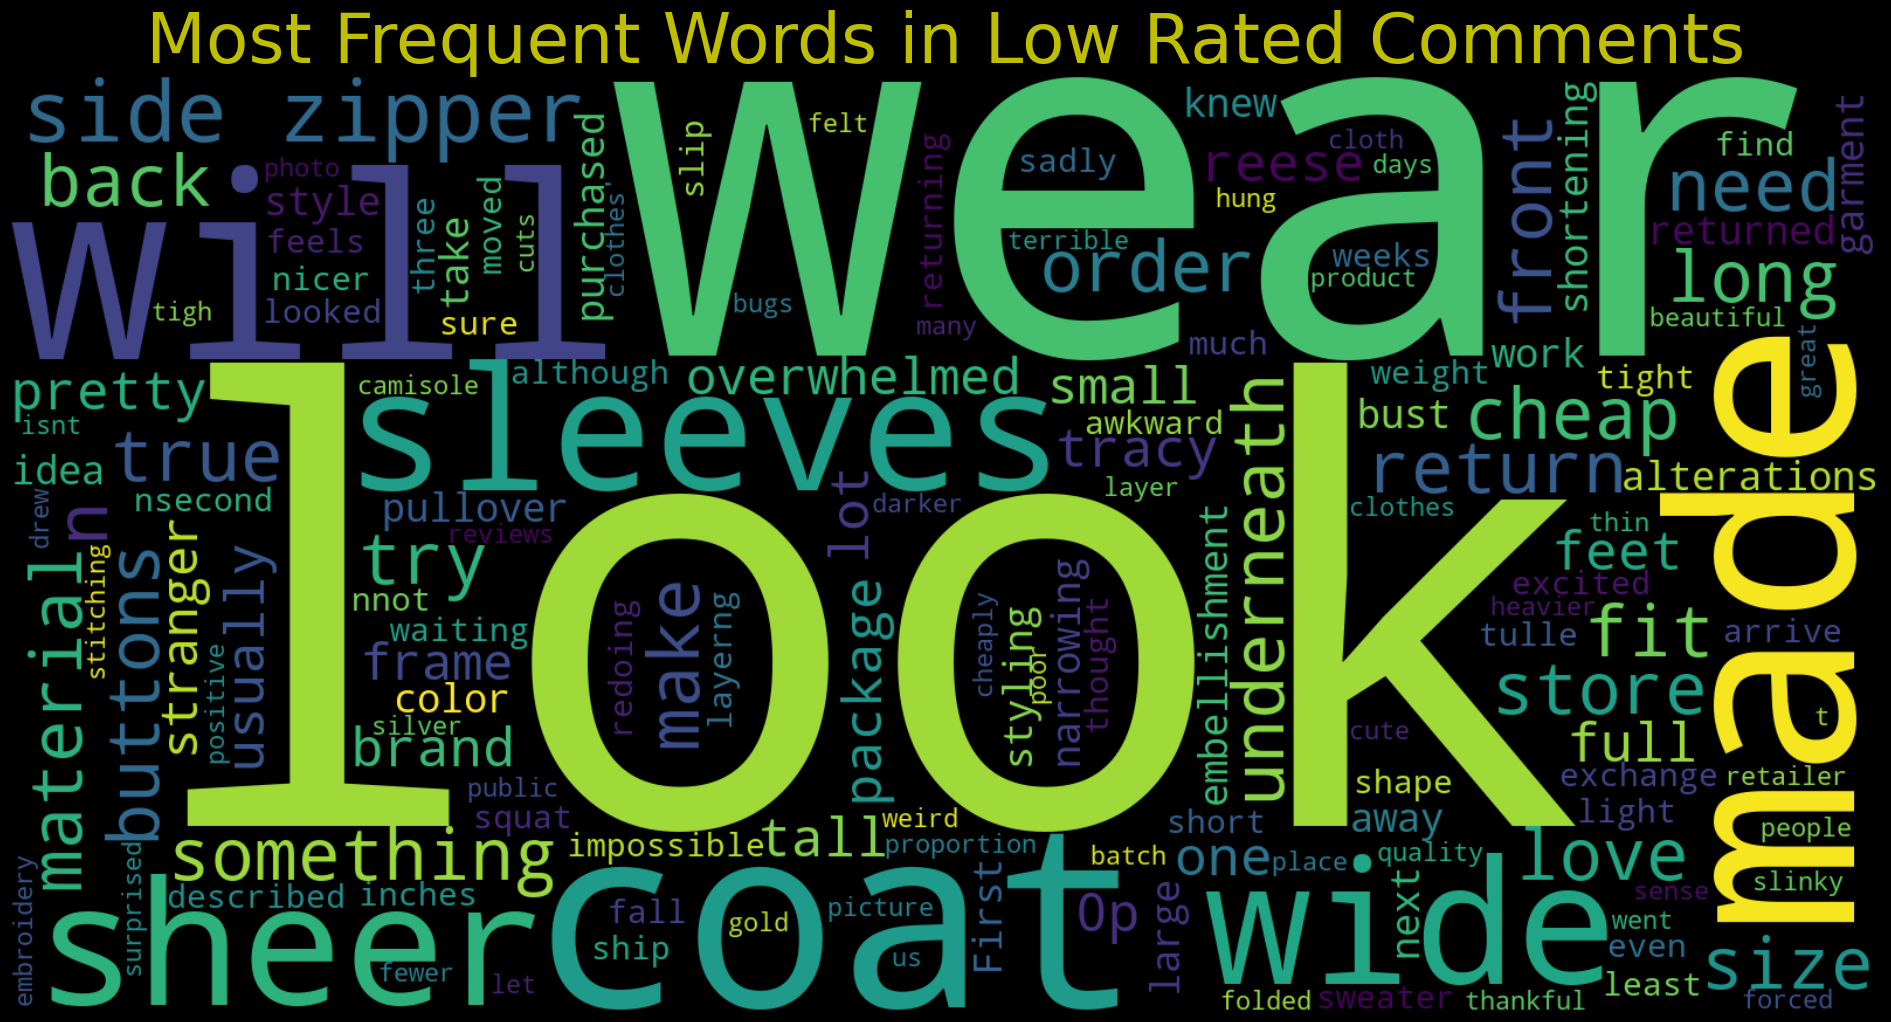

In [437]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

# Ensure the necessary NLTK data is available
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function
def preprocessing(data):
    # Convert text to lowercase and concatenate into a single string
    text = data.str.lower().str.cat(sep=' ')
    
    # Tokenize the text
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]
    
    # Apply stemming if desired (optional, can be removed if not needed)
    ps = nltk.PorterStemmer()
    words = [ps.stem(w) for w in words]
    
    return words

# For highly-rated comments
title = 'Most Frequent Words in Highly Rated Comments'
temp = df['Review Text'][df['Rating'].astype(int) >= 3]

# Modify Stopwords to exclude class types such as 'dress'
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df['Class Name'][df['Class Name'].notnull()].unique())]
                + ['dress', 'petite'])

# Generate word cloud
cloud(text=temp.values, title=title, stopwords=new_stop)

# Generate word frequency bar chart for top 20 words
top_words_high = wordfreq(preprocessing(temp), 20)
top_words_high.plot.bar(rot=45, legend=False, figsize=(15, 5), color='g', title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.savefig('most-freq-words-high-rate-comments.png', format='png', dpi=300)
plt.show()

# For low-rated comments
title = 'Most Frequent Words in Low Rated Comments'
temp = df['Review Text'][df['Rating'].astype(int) < 3]

# Modify Stopwords to exclude additional class types
new_stop.update(['skirt', 'shirt'])

# Generate word cloud for low-rated comments
cloud(text=temp.values, title=title, stopwords=new_stop)


Final report of the customer review data for clothing items:

1. Sentiment and Rating Analysis:

- There is a strong positive correlation between rating mean and recommended mean (Image 1), suggesting that highly rated items are more likely to be recommended.

- The majority of reviews are positive, with "Positive" sentiment occurring most frequently (Image 2 and 3).

- 5-star ratings are the most common, followed by 4-star ratings (Image 3). This indicates overall customer satisfaction with the products.

- Positive sentiment is strongly associated with higher ratings, while negative sentiment is more prevalent in lower ratings (Image 3).

2. Word Usage in Reviews:

- Frequently used words in highly rated comments include "layer", "fit", "love", "soft", and "comfortable" (Image 5). This suggests customers value these qualities in clothing items.

- Low-rated comments often mention "wear", "sleeves", "look", and "size" (Image 5). This could indicate issues with durability, fit, or appearance in less satisfactory products.

3. Correlations Between Variables:

- Age has a weak positive correlation with rating (Image 4), suggesting older customers might rate items slightly higher.

- There's a moderate positive correlation between positive feedback count and rating (Image 4), indicating that items with more positive feedback tend to have higher ratings.

- Word count has a weak negative correlation with rating (Image 4), which might suggest that longer reviews are slightly more critical.

4. Recommended Items:

- Recommended items (Recommended IND = 1) have a higher proportion of positive sentiments compared to not recommended items (Image 2).

- The vast majority of reviews for recommended items are positive, with very few negative or neutral sentiments (Image 2).

5. Review Distribution:

- There's a slight positive relationship between rating mean and recommended mean when grouped by clothing ID (Image 1, scatter plot), reinforcing the correlation between high ratings and recommendations.

Conclusion:

The analysis reveals generally positive customer sentiment towards the clothing items, with a strong link between high ratings and recommendations. Key factors influencing positive reviews include comfort, fit, and softness. Areas for improvement might be found by examining the concerns raised in lower-rated reviews, particularly regarding wear, sleeves, and sizing issues. The data suggests that focusing on these aspects could potentially improve customer satisfaction and ratings.